Fit a logistic regression model to classify neural events using the fourier data from eeg signals

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_10000_samples.csv"
TRAIN_PATH = "reformatted_train_1000_random_samples.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[92636160.0 7652136.211433023 5729421.189524368 ... -2.2409816286876434
  1.252962007547587 'Other']
 [630.814697265625 66702.40976655483 8893.838231082445 ...
  2.369798589495815 0.1484608324515774 'Seizure']
 [1114.8466796875 77800.81994993985 21862.291056829137 ...
  -2.256339830118716 -2.47948628883977 'GRDA']
 ...
 [260.6326904296875 73032.2099840641 3827.297477405926 ...
  0.22663436377499 2.516505553234339 'Other']
 [8304.0400390625 45076.58010093868 54408.55792129069 ...
  -2.800785931016272 -1.1605244837722708 'Seizure']
 [341585.5 39616.15870946646 8707.543352498395 ... 0.4908526116360459
  -2.814187541116582 'LPD']]
(1000, 821)


In [3]:
x = data_np[:, 0:820]
y = data_np[:, 820]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [4]:
# Create the model
model_scikit = LogisticRegression()

# Train
model_scikit.fit(x_train, y_train)
predictions_train = model_scikit.predict(x_train)
score_train = model_scikit.score(x_train, y_train)
print('Training Accuracy: {:.4f}'.format(score_train))

# Validate
predictions_val = model_scikit.predict(x_val)
score_val = model_scikit.score(x_val, y_val)
print('Validation Accuracy: {:.4f}'.format(score_val))

# Test
predictions_test = model_scikit.predict(x_test)
score_test = model_scikit.score(x_test, y_test)
print('Test Accuracy: {:.4f}'.format(score_test))

Training Accuracy: 0.2338
Validation Accuracy: 0.2400
Test Accuracy: 0.1500


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Test out a number of models
models = []
val_scores = []
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  
num_iterations = [100, 150, 200, 500]

for solver in solvers:

    for iter in num_iterations:

        model = LogisticRegression(solver=solver, max_iter = iter)

        model.fit(x_train, y_train)

        models.append(model)

        predictions_train = model.predict(x_train)
        score_train = model.score(x_train, y_train)

        predictions_val = model.predict(x_val)
        score_val = model.score(x_val, y_val)

        val_scores.append(score_val)

        print('Solver: {}, Iterations: {}'.format(solver, iter))
        print('Training accuracy: {:0.5f}  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

# Choose the best model based on highest validation accuracy
print(val_scores)
best_model_idx = np.argmax(val_scores)
best_model = models[best_model_idx]


# Sanity check
print('\nBest solver: {}'.format(solvers[best_model_idx // len(num_iterations)]))
print('Best num iterations: {}'.format(num_iterations[best_model_idx % len(num_iterations)]))

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 100
Training accuracy: 37.50000  Validation accuracy: 29.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 150
Training accuracy: 42.87500  Validation accuracy: 28.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 200
Training accuracy: 49.00000  Validation accuracy: 32.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 500
Training accuracy: 60.12500  Validation accuracy: 27.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 100
Training accuracy: 76.50000  Validation accuracy: 32.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150
Training accuracy: 87.62500  Validation accuracy: 28.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 200
Training accuracy: 95.75000  Validation accuracy: 30.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 500
Training accuracy: 100.00000  Validation accuracy: 32.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 100
Training accuracy: 23.37500  Validation accuracy: 24.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 150
Training accuracy: 26.25000  Validation accuracy: 23.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 200
Training accuracy: 34.25000  Validation accuracy: 23.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 500
Training accuracy: 40.75000  Validation accuracy: 31.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 100
Training accuracy: 18.00000  Validation accuracy: 25.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 150
Training accuracy: 18.50000  Validation accuracy: 24.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 200
Training accuracy: 18.25000  Validation accuracy: 23.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 500
Training accuracy: 18.75000  Validation accuracy: 23.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 100
Training accuracy: 18.37500  Validation accuracy: 25.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 150
Training accuracy: 17.62500  Validation accuracy: 22.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 200
Training accuracy: 18.12500  Validation accuracy: 25.00%
Solver: saga, Iterations: 500
Training accuracy: 18.50000  Validation accuracy: 23.00%
[0.29, 0.28, 0.32, 0.27, 0.32, 0.28, 0.3, 0.32, 0.24, 0.23, 0.23, 0.31, 0.25, 0.24, 0.23, 0.23, 0.25, 0.22, 0.25, 0.23]

Best solver: liblinear
Best num iterations: 200
The test results.... 32.00%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Accuracy Score: 0.32')

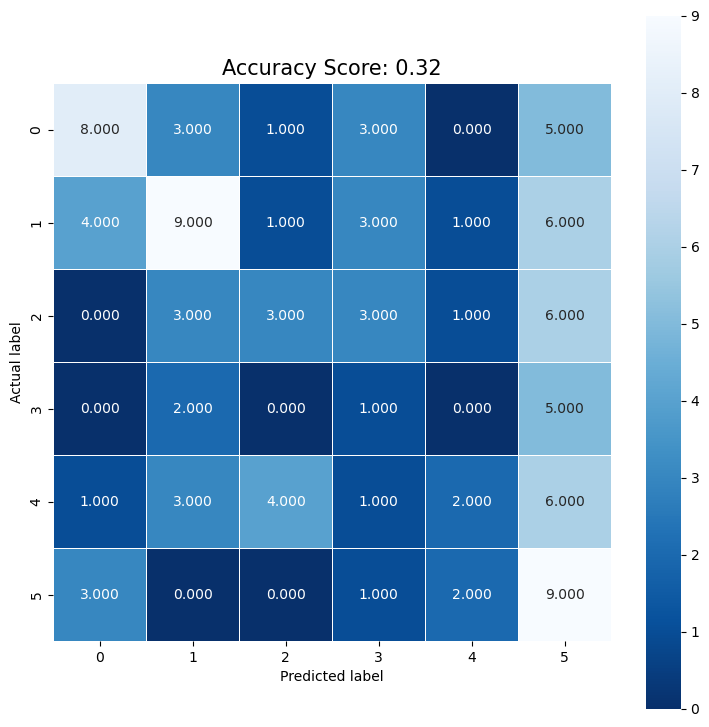

In [6]:
cm = skmetrics.confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)

In [7]:
kullback_leibler_train = skmetrics.mutual_info_score(y_train, predictions_train)
kullback_leibler_test = skmetrics.mutual_info_score(y_test, predictions_test)

print(kullback_leibler_train)
print(kullback_leibler_test)

0.00435628926865915
0.22469821037301801


In [8]:
TRAIN_PATH = "reformatted_train_10000_samples.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'reformatted_train_10000_samples.csv'

In [ ]:
x = data_np[:, 0:820]
y = data_np[:, 820]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [ ]:
# Rerun on the optimal dataset
max_iter = 150
solver = 'newton-cg'

model = LogisticRegression(solver=solver, max_iter=max_iter) 

model.fit(x_train, y_train)

predictions_train = model.predict(x_train)
score_train = model.score(x_train, y_train)

predictions_val = model.predict(x_val)
score_val = model.score(x_val, y_val)

predictions_test = model.predict(x_test)
score_test = model.score(x_test, y_test)

print('Solver: {}, Iterations: {}'.format(solver, max_iter))
print('Training accuracy: {:0.2f}%\nValidation accuracy: {:0.2f}%\nTest accuracy: {:0.2f}%'.format(score_train*100, score_val*100, score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150
Training accuracy: 59.46%
Validation accuracy: 54.38%\Test accuracy: 54.33%


In [ ]:
kullback_leibler_train = skmetrics.mutual_info_score(y_train, predictions_train)
kullback_leibler_test = skmetrics.mutual_info_score(y_test, predictions_test)

print(kullback_leibler_train)
print(kullback_leibler_test)

0.49561234380388647
0.4072556349567824
